# Artificial Neural Networks (ANNs)

* **Deep Learning** is a sub-field of ML that uses algorithms inspired by the structure and function of the brain's neural networks.
* For this reason, the models used in DL are called **ANNs**.
* ANNs are computing systems that are inspired by the brain's neural networks.
* These networks are based on a collection of connected units called **artificial neurons** or **neurons**.
* Each connection between neurons can transmit a signal from one neuron to another.
* The receiving neuron processes the signal and signals downstream neurons connected to it.
* Neurons are organized in layers:
  * **Input layer:** One node for each component of the input data.
  * **Hidden layers:** Arbitrarily chosen number of nodes for each hidden layer.
  * **Output layer:** One node for each of the possible desired outputs.

## Visualizing an ANN

![](imgs/ann_232.png)

This ANN has three layers total. The layer on the left is the input layer. The layer on the right is the output layer, and the layer in the middle is the hidden layer. Each layer is comprised of neurons or nodes

Number of nodes in each layer:

* **Input layer (left)**: 2 nodes.
* **Hidden layer (middle)**: 3 nodes.
* **Output layer (right)**: 2 nodes.

### Keras Sequential Model

The Sequential model is a linear stack of layers.

In [1]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_shape=(2,), activation="relu"))
model.add(Dense(2, activation="softmax"))

Using TensorFlow backend.


## Layers in an ANN

Different layers perform different transformations on their inputs, and some layers are better suited for some tasks than others. Some examples of layers:

* **Dense (or fully connected) layers**: Fully connects each input to each output within its layer.
* **Convolutional layers**: Are usually used in models that are doing work with image data.
* **Pooling layers**.
* **Recurrent layers**: Are used in models that are doing work with time series data,.
* **Normalization layers**.

#### Layer weights

* Each connection between two nodes has an associated weight, which is just a number.
* Each weight represents the strength of the connection between the two nodes.
* When the network receives an input at a given node in the input layer, this input is passed to the next node via a connection, and the input will be multiplied by the weight assigned to that connection.
* For each node in the second layer, a weighted sum is then computed with each of the incoming connections. This sum is then passed to an activation function, which performs some type of transformation on the given sum.
* **node output = activation(weighted sum of inputs)**.

![](imgs/simple_nn.png)

#### Forward pass through a NN

* While there are many, many different NN architectures, the most common architecture is the feedforward network.
* Once we obtain the output for a given node, the obtained output is the value that is passed as input to the nodes in the next layer.
* This process continues until the output layer is reached. 
* The number of nodes in the output layer depends on the number of possible output or prediction classes we have.

## Activation Functions in an ANN

* In an ANN, an activation function is a function that maps a node's inputs to its corresponding output.
* An activation function is biologically inspired by activity in our brains where different neurons fire (or are activated) by different stimuli.

![](imgs/activation_step.png)
![](imgs/activation_sigmoid.png)
![](imgs/activation_tanh.png)
![](imgs/activation_relu.png)
![](imgs/activation_leaky_relu.png)
![](imgs/activation_elu.png)

## Training an ANN

* When we train a model, we’re basically trying to solve an optimization problem.
* We're trying to optimize the weights within the model.
* Our task is to find the weights that most accurately map our input data to the correct output class.
* This mapping is what the network must learn.
* We learn how each connection between nodes has an arbitrary weight assigned to it. During training, these weights are iteratively updated and moved towards their optimal values.


### Optimization algorithm

* The weights are optimized using what we call an optimization algorithm.
* The optimization process depends on the chosen optimization algorithm. 
* We also use the term optimizer to refer to the chosen algorithm.
* The most widely known optimizer is called **SGD (Stochastic Gradient Descent)*.
* The objective of SGD is to minimize some given function that we call a loss function. So, SGD updates the model's weights in such a way as to make this loss function as close to its minimum value as possible.

### Loss function

* One common loss function is **Mean squared error (MSE)**, but there are several loss functions that we could use in its place.
* The loss is the error or difference between what the network is predicting versus the true label, and SGD will to try to minimize this error to make our model as accurate as possible in its predictions.
* After passing all of our data through our model, we're going to continue passing the same data over and over again. This process of repeatedly sending the same data through the network is considered training. During this training process is when the model will actually learn.
* Learn more about loss functions: http://deeplizard.com/learn/video/Skc8nqJirJg

## How a NN learns

* We learned about the training process and saw that each data point used for training is passed through the network.
* This pass through the network from input to output is called a **forward pass**, and the resulting output depends on the weights at each connection inside the network.
* Once all of the data points in our dataset have been passed through the network, we say that an **epoch** is complete.
* Once the output is obtained, the loss (or the error) can be computed for that specific output by looking at what the model predicted versus the true label. The loss computation depends on the chosen loss function.

### Gradient of the loss function

* After the loss is calculated, the gradient of this loss function is computed with respect to each of the weights within the network. Note, gradient is just a word for the derivative of a function of several variables.
* At this point, we've calculated the loss of a single output, and we calculate the gradient of that loss with respect to our single chosen weight. This calculation is done using a technique called **backpropagation**.
* Once we have the value for the gradient of the loss function, we can use this value to update the model's weight.
* The gradient tells us which direction will move the loss towards the minimum, and our task is to move in a direction that lowers the loss and steps closer to this minimum value.

### Learning rate

* We then multiply the gradient value by something called a **learning rate**. A learning rate is a small number usually ranging between 0.01 and 0.0001, but the actual value can vary.
* The learning rate tells us how large of a step we should take in the direction of the minimum.

### Updating the weights

* We multiply the gradient with the learning rate, and we subtract this product from the weight, which will give us the new updated value for this weight.
* **new weight = old weight - (learning rate * gradient)**.

* More info about **Backpropagation**:
  * Deep Lizard - Backpropagation explained: http://deeplizard.com/learn/video/XE3krf3CQls
  * A Step by Step Backpropagation Example (Matt Mazur): https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/
  * Backpropagation Step by Step: https://hmkcode.github.io/ai/backpropagation-step-by-step/
  * Back-Propagation is very simple. Who made it Complicated?: https://medium.com/@14prakash/back-propagation-is-very-simple-who-made-it-complicated-97b794c97e5c
  * Backpropagation algorithm - Playground: https://google-developers.appspot.com/machine-learning/crash-course/backprop-scroll/

## ANN with Keras

### Multi-layer Networks con Keras - CIFAR-10 dataset

[The CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

In [2]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
# load the training and testing data, scale it into the range [0, 1], then reshape the design matrix
# CIFAR-10 dataset: 170 MB
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

[INFO] loading CIFAR-10 data...


In [4]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

In [5]:
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [6]:
# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [7]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 72s 1ms/step - loss: 1.8378 - acc: 0.3439 - val_loss: 1.7527 - val_acc: 0.3715
Epoch 2/100
50000/50000 [==============================] - 72s 1ms/step - loss: 1.6492 - acc: 0.4162 - val_loss: 1.9147 - val_acc: 0.3179
Epoch 3/100
50000/50000 [==============================] - 66s 1ms/step - loss: 1.5683 - acc: 0.4444 - val_loss: 1.5617 - val_acc: 0.4394
Epoch 4/100
50000/50000 [==============================] - 66s 1ms/step - loss: 1.5099 - acc: 0.4673 - val_loss: 1.4982 - val_acc: 0.4749
Epoch 5/100
50000/50000 [==============================] - 66s 1ms/step - loss: 1.4586 - acc: 0.4843 - val_loss: 1.4868 - val_acc: 0.4763
Epoch 6/100
50000/50000 [==============================] - 67s 1ms/step - loss: 1.4216 - acc: 0.5002 - val_loss: 1.4506 - val_acc: 0.4780
Epoch 7/100
50000/50000 [==============================] - 72s 1ms/step - loss: 1.3838 - acc: 0

In [8]:
# evaluate the network 
print("[INFO] evaluating the network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating the network...
              precision    recall  f1-score   support

    airplane       0.69      0.55      0.61      1000
  automobile       0.67      0.67      0.67      1000
        bird       0.42      0.49      0.45      1000
         cat       0.39      0.42      0.40      1000
        deer       0.49      0.50      0.50      1000
         dog       0.46      0.44      0.45      1000
        frog       0.59      0.65      0.62      1000
       horse       0.64      0.62      0.63      1000
        ship       0.70      0.67      0.69      1000
       truck       0.62      0.60      0.61      1000

   micro avg       0.56      0.56      0.56     10000
   macro avg       0.57      0.56      0.56     10000
weighted avg       0.57      0.56      0.56     10000



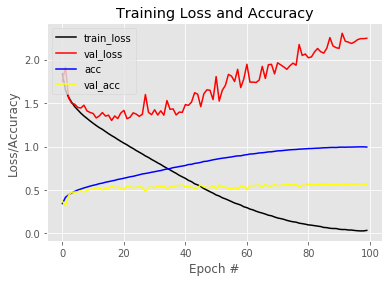

In [11]:
# plot our training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], color="black", label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], color="red", label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], color="blue", label="acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], color="yellow", label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

# References

* **Deep Lizard**:
  * Artificial Neural Networks explained: http://deeplizard.com/learn/video/hfK_dvC-avg
  * Layers in a Neural Network explained: http://deeplizard.com/learn/video/FK77zZxaBoI
  * Activation Functions in a Neural Network explained: http://deeplizard.com/learn/video/m0pIlLfpXWE
  * Training a Neural Network explained: http://deeplizard.com/learn/video/sZAlS3_dnk0
  * How a Neural Network Learns explained: http://deeplizard.com/learn/video/_N5kpSMDf4o
* **PyImageSearch**:
  * Book "Deep Learning for Computer Vision - Starter Bundle": https://www.pyimagesearch.com/deep-learning-computer-vision-python-book/